Libraries Imported


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [9]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [10]:
#first 5 value
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#last 5 values
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
#statistical measure
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding Correlation (positive and negative)

In [14]:
correlation = gold_data.corr()

<ipython-input-14-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

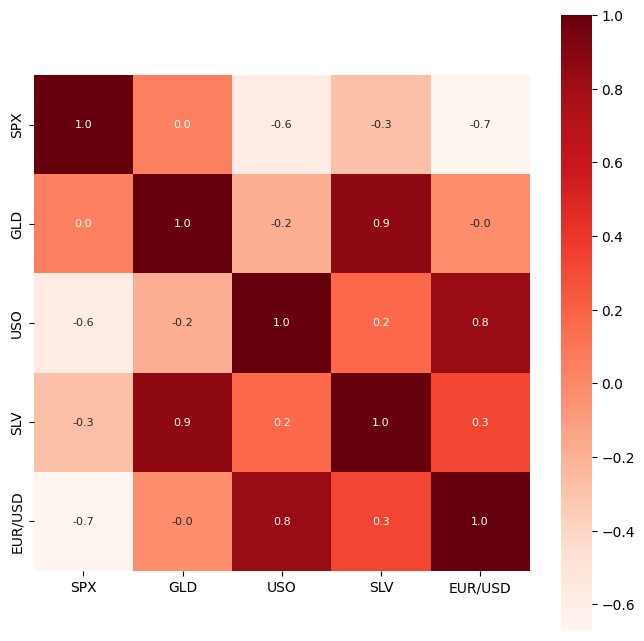

In [16]:
#heatmap for corelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

<ipython-input-18-4b5ab67f7bf0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

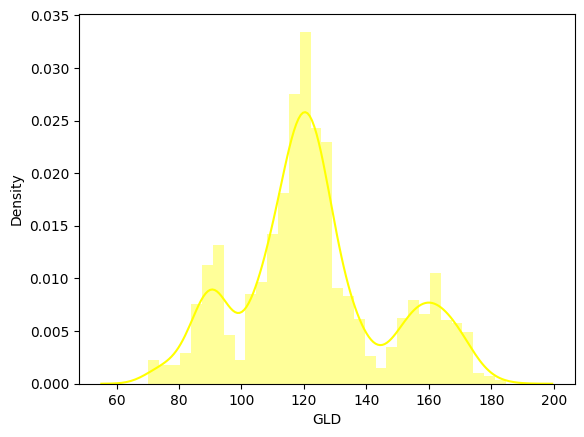

In [18]:
#checking distribution
sns.distplot(gold_data['GLD'],color='yellow')

Splitting the features and target


In [19]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [20]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Test and Train Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2 )

Model Training: Random Forest Algo

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#training
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [24]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.69569978  81.90169995 116.21210001 127.49740104 120.70750126
 154.84179812 150.20839795 126.09600015 117.43679887 126.02410107
 116.64400056 171.13560088 141.25669883 167.89849864 115.30130001
 117.77850056 138.25240234 170.05490108 159.41380333 160.22579959
 155.16560037 125.27100004 175.96040006 157.16390352 125.25280026
  93.71629969  77.26650036 120.09600003 119.07369921 167.4492004
  88.29540046 125.33240028  91.04420077 117.72400037 121.12869926
 136.85800052 115.30480145 114.93040062 148.98159992 107.18380055
 104.44970241  87.19289788 126.45730064 117.61930023 152.39929916
 119.7089     108.26170016 108.23389845  93.23650018 127.24839764
  75.00570022 113.76929945 121.38850009 111.2755994  118.88649896
 120.38599944 160.09690041 168.8143007  146.90219696  85.74679868
  94.31770027  86.90459914  90.57120015 118.85960105 126.45200091
 127.40049966 169.38029951 122.22899976 117.2944991   98.52290037
 168.51690098 143.40639806 132.04460231 121.13020216 121.63199943
 119.919000

In [27]:
#R squad error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squard error: ", error_score)

R squard error:  0.9891008517022762


Comparing actual and predicted value in plot

In [31]:
Y_test=list(Y_test)

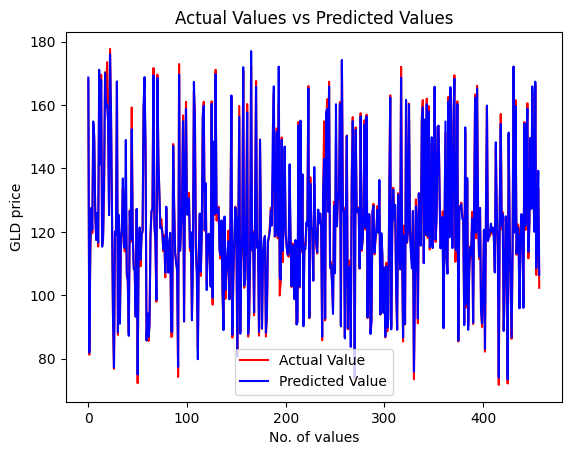

In [34]:
plt.plot(Y_test, color='red',label ='Actual Value')
plt.plot(test_data_prediction, color='blue',label='Predicted Value')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('No. of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()